In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import seaborn as sns
import sklearn as skl
pd.options.display.max_columns = 500
import warnings
warnings.filterwarnings('ignore')

In [2]:
def relaciones_vs_target(X, Y, return_type='axes'):
    fig_tot = (len(X.columns))
    fig_por_fila = 3.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    
    fig_tot = len(x.columns)
    fig_tot_fila = 4.; fig_tamanio = 4.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))
    plt.subplots_adjust(hspace=0.5)

In [3]:
file_path = 'depresión_ansiedad_1.csv'
XY = pd.read_csv(file_path)

In [4]:
XY.head()

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
0,1,19,male,33.33,Class I Obesity,9.0,Mild,False,False,False,11,Moderate,True,False,False,7.0,False,False
1,1,18,male,19.84,Normal,8.0,Mild,False,False,False,5,Mild,False,False,False,14.0,True,False
2,1,19,male,25.10,Overweight,8.0,Mild,False,False,False,6,Mild,False,False,False,6.0,False,False
3,1,18,female,23.74,Normal,19.0,Severe,True,False,False,15,Severe,True,False,False,11.0,True,True
4,1,18,male,25.62,Overweight,6.0,Mild,False,False,False,14,Moderate,True,False,False,3.0,False,False


## Análisis Exploratorio de los Datos:

In [5]:
XY.dtypes

school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score               float64
depression_severity      object
depressiveness             bool
depression_diagnosis       bool
depression_treatment       bool
gad_score                 int64
anxiety_severity         object
anxiousness                bool
anxiety_diagnosis          bool
anxiety_treatment          bool
epworth_score           float64
sleepiness                 bool
suicidal                   bool
dtype: object

### Gráficos y distribuciones

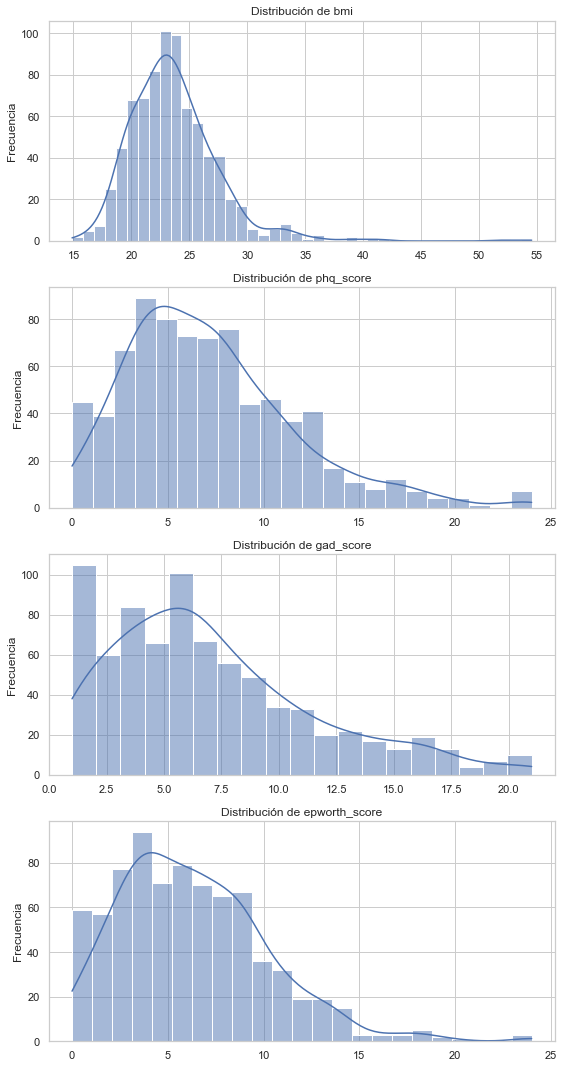

In [6]:
# Ajustes para mejorar la visualización
sns.set(style="whitegrid")

# Lista de variables numéricas
numeric_vars = ['bmi', 'phq_score', 'gad_score', 'epworth_score']

# Crear un histograma para cada variable numérica
fig, ax = plt.subplots(len(numeric_vars), 1, figsize=(8, 15))
for i, var in enumerate(numeric_vars):
    sns.histplot(XY[var], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribución de {var}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('./histogramas_variables_numericas.png')
plt.show()

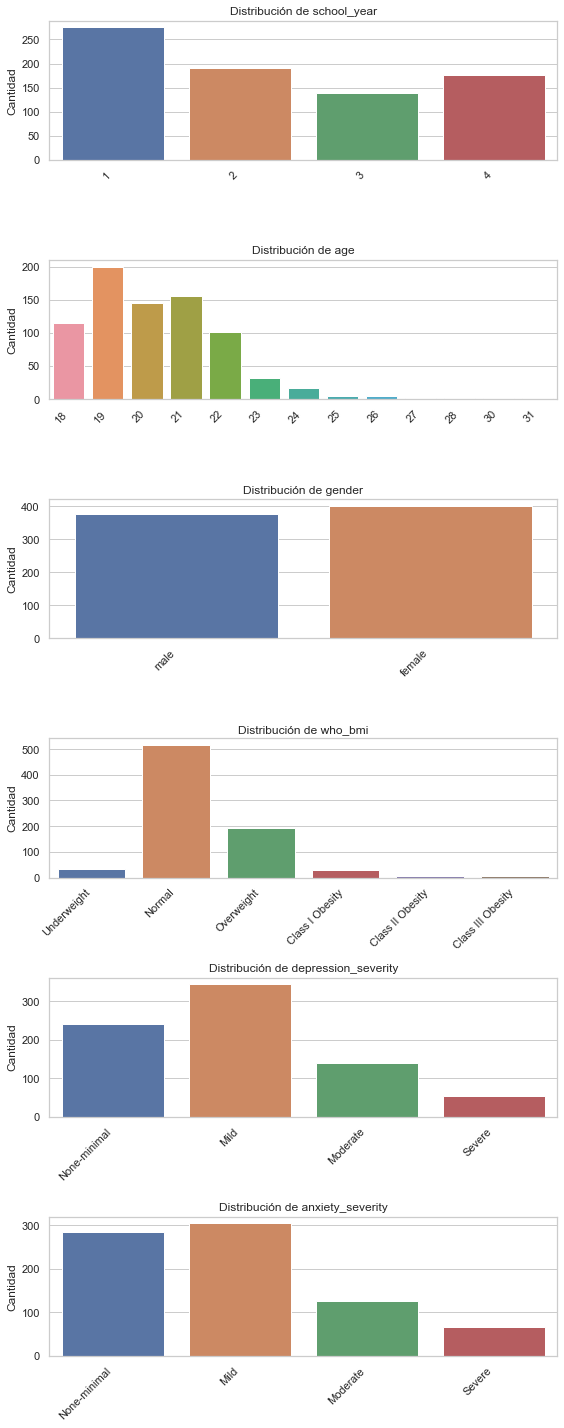

In [7]:
# Ajustes para mejorar la visualización
sns.set(style="whitegrid")

# Lista de variables categóricas
categorical_vars = ['school_year', 'age','gender', 'who_bmi', 'depression_severity', 'anxiety_severity']

# Orden específico para cada categoría
order_who_bmi = ['Underweight', 'Normal', 'Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity']
order_depression_severity = ['None-minimal', 'Mild', 'Moderate', 'Severe']
order_anxiety_severity = ['None-minimal', 'Mild', 'Moderate', 'Severe']

# Diccionario para mapear cada variable a su orden específico
orders = {
    'who_bmi': order_who_bmi,
    'depression_severity': order_depression_severity,
    'anxiety_severity': order_anxiety_severity
}

# Crear un gráfico de barras para cada variable categórica
fig, ax = plt.subplots(len(categorical_vars), 1, figsize=(8, 20))
for i, var in enumerate(categorical_vars):
    # Usar el orden específico si la variable está en el diccionario, de lo contrario, no especificar orden
    specific_order = orders.get(var)
    sns.countplot(data=XY, x=var, ax=ax[i], order=specific_order)
    ax[i].set_title(f'Distribución de {var}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Cantidad')
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.savefig('./histogramas_variables_categóricas.png')
plt.show()

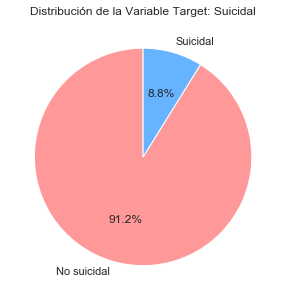

In [9]:
# Recuperación de los conteos de valores para la variable 'suicidal'
suicidal_counts = XY['suicidal'].value_counts()

# Etiquetas para los segmentos del gráfico de tarta
labels = ['No suicidal', 'Suicidal']
# Extracción de valores para cada categoría
values = [suicidal_counts[0], suicidal_counts[1]]

# Creación del gráfico de tarta
plt.figure(figsize=(5, 5))  # Ajusta el tamaño para una mejor visualización
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribución de la Variable Target: Suicidal')
plt.savefig('./distribución_target.png')
plt.show()

### Análisis bivariado y multivariado

##### Codificación de variables

In [10]:
# Diccionarios de mapeo para variables categóricas
map_gender = {'male': 0, 'female': 1}
map_who_bmi = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Class I Obesity': 3,
    'Class II Obesity': 4,
    'Class III Obesity': 5
}
map_depression_severity = {'None-minimal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
map_anxiety_severity = {'None-minimal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}

# Aplicar mapeo a variables categóricas
XY['gender'] = XY['gender'].map(map_gender)
XY['who_bmi'] = XY['who_bmi'].map(map_who_bmi)
XY['depression_severity'] = XY['depression_severity'].map(map_depression_severity)
XY['anxiety_severity'] = XY['anxiety_severity'].map(map_anxiety_severity)

# Convertir variables booleanas a enteros
bool_columns = ['depressiveness', 'depression_diagnosis', 'depression_treatment',
                'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness', 'suicidal']
XY[bool_columns] = XY[bool_columns].astype(int)

##### División del dataset

In [11]:
X = XY.drop("suicidal", axis = 1)
Y = XY["suicidal"]

##### Boxplot de las variables explicativas

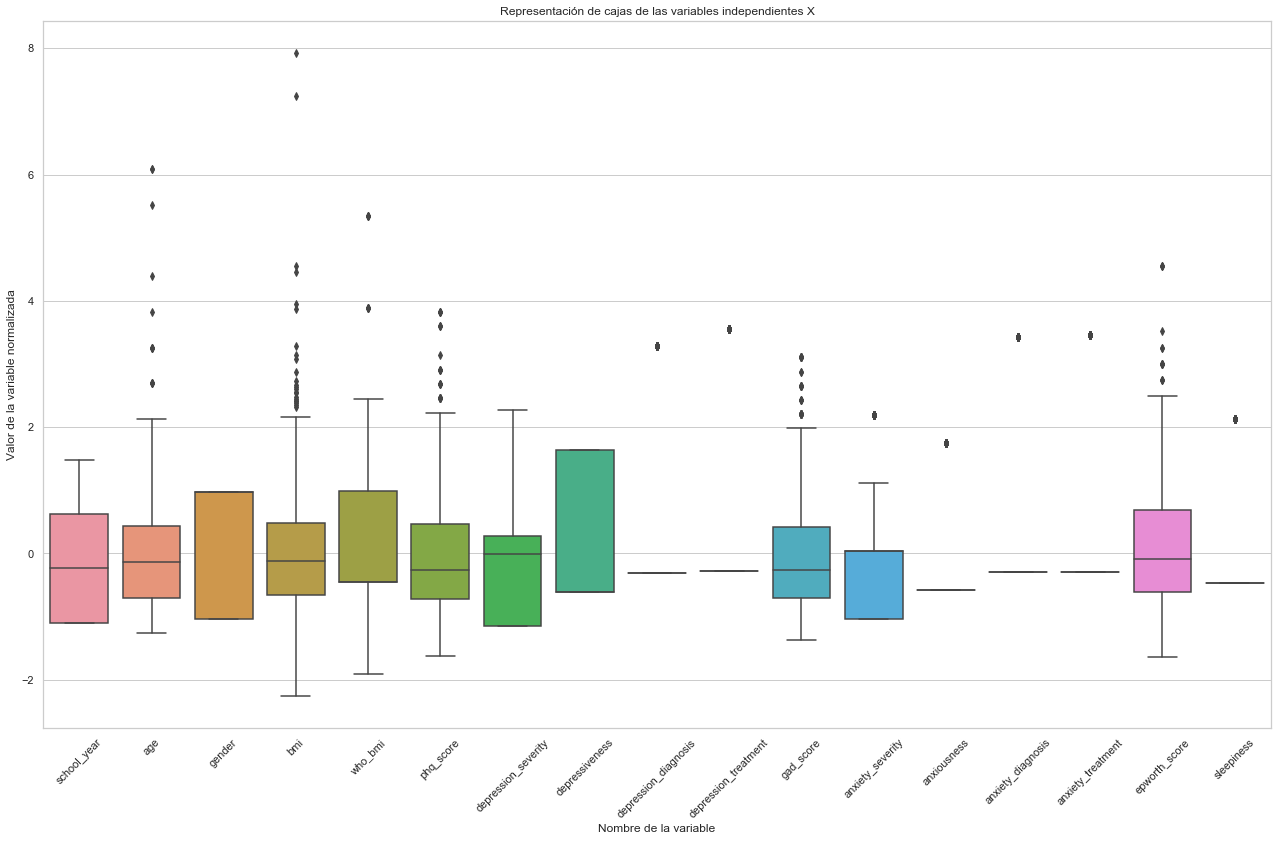

In [18]:
X_normalizado = (X-X.mean())/X.std()
plt.figure(figsize = (22,13))
ax = sns.boxplot(data = X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title(u"Representación de cajas de las variables independientes X")
plt.ylabel("Valor de la variable normalizada")
plt.savefig('./boxplot_variables_explicativas.png')
_ = plt.xlabel("Nombre de la variable")

**Análisis del gráfico de cajas:**

- **Centralización:** Las medianas (líneas dentro de las cajas) están cerca de cero en la mayoría de las variables, lo cual es esperado ya que los datos han sido normalizados.


- **Dispersión:** La variación en el tamaño de las cajas (que representa el rango intercuartílico) indica cuánto se dispersan los valores en cada variable.


- **Simetría:** Si una caja se desplaza significativamente hacia arriba o hacia abajo respecto a la línea del cero, podría indicar sesgos en la distribución de esa variable.


- **Valores atípicos:** Los puntos fuera de las 'bigotes' del gráfico indican valores atípicos que pueden ser de interés o que podrían requerir atención especial durante el análisis de datos.


1. **Variables con valores atípicos significativos:**
Algunas variables, como bmi, phq_score, gad_score, y epworth_score muestran un número considerable de valores atípicos. Estos valores se extienden bastante lejos del rango intercuartílico, lo que indica extremos que podrían estar asociados con casos particulares o errores de medición.


2. **Distribuciones desequilibradas:**
Las variables como phq_score y gad_score también muestran un sesgo en su distribución. La mediana de estas variables está desplazada hacia el extremo inferior del rango, lo que indica que la mayoría de los estudiantes tienen puntuaciones bajas en estas escalas, pero hay algunos con puntuaciones significativamente más altas.
La variable epworth_score también parece tener un sesgo hacia valores más bajos, pero con suficientes valores atípicos en el extremo superior que sugieren casos de alta somnolencia.


3. **Variables con distribuciones posiblemente sesgadas:**
La variable bmi tiene una distribución que sugiere un sesgo hacia el rango normal, pero con valores atípicos tanto en el rango bajo como en el alto, indicando casos de bajo peso y varios grados de obesidad.

In [19]:
def remove_outliers_iqr(df, column):
    """Remove outliers from a specific column based on IQR range."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# Eliminar outliers de todas las columnas numéricas en X
def remove_outliers_iqr_all(X, Y):
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    X_clean = X.copy()
    for col in numeric_cols:
        X_clean = remove_outliers_iqr(X_clean, col)
    
    # Filtrar Y para que coincida con las filas limpiadas en X_clean
    Y_clean = Y.loc[X_clean.index]
    
    return X_clean, Y_clean

In [22]:
# Aplicar la función de limpieza al dataset
X_clean, Y_clean = remove_outliers_iqr_all(X, Y)

##### Relaciones variables explicativas y variable explicada

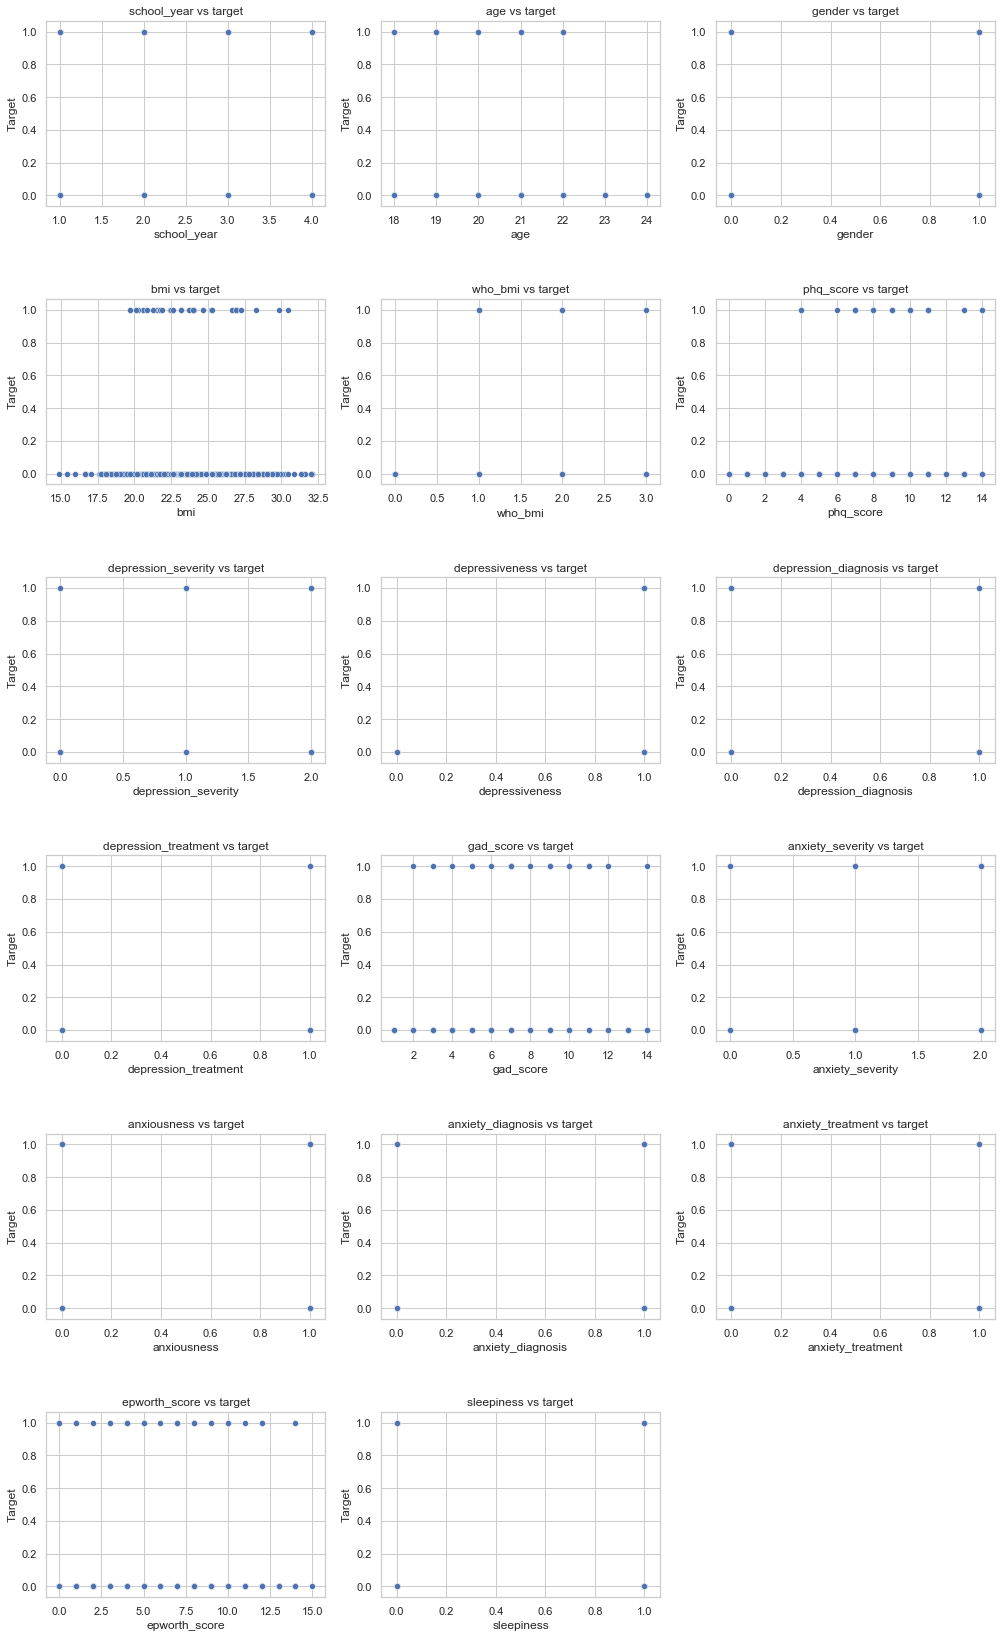

In [24]:
relaciones_vs_target(X_clean,Y_clean)

A partir de los gráficos de dispersión que generamos, identificar las variables con mayor potencial de impacto sobre la variable objetivo 'suicidal' implica buscar aquellas donde se observa alguna diferenciación clara en la dispersión de puntos entre los valores de suicidal (0 y 1). 

##### Histogramas Suicidal (1) - No suicidal (0) para cada variable explicativa:

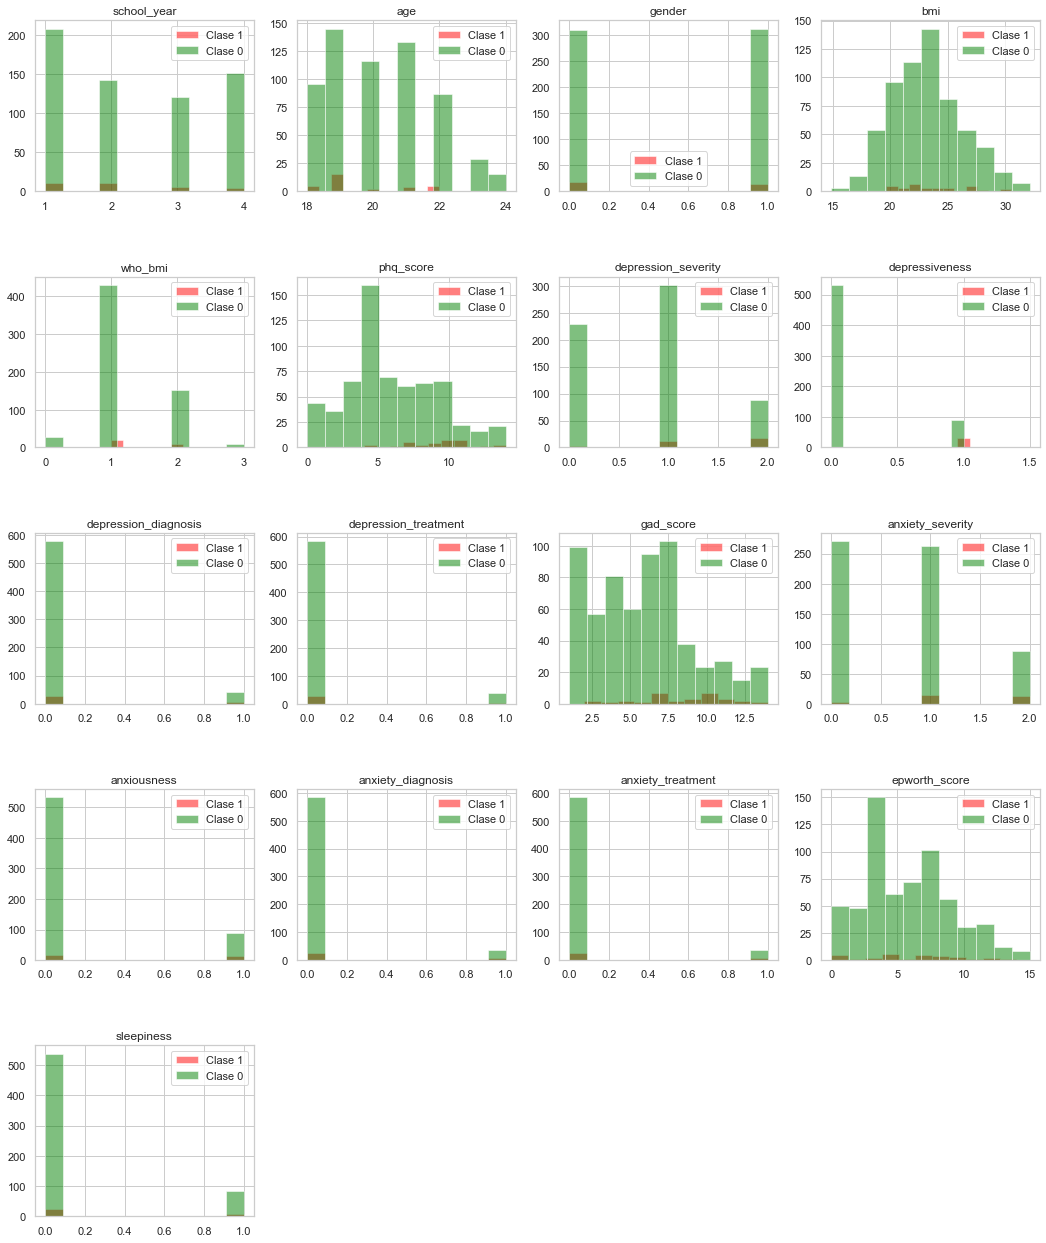

In [23]:
hist_pos_neg_feat(X_clean, Y_clean)

- **Separación entre las Clases:** Si los histogramas de las dos clases (suicidal vs no suicidal) para una variable específica son claramente distintos, esto sugiere que la variable podría ser un buen predictor de suicidal. Por ejemplo, si la mayoría de los valores para suicidal = 1 se agrupan en un extremo del rango de la variable y difieren del agrupamiento de suicidal = 0, esto indica una relación potencial.


- **Superposición de las Clases:** Si los histogramas de las dos clases se superponen significativamente, puede indicar que la variable por sí sola tiene menos capacidad para diferenciar entre los casos suicidal y no suicidal.


- **Formas de las Distribuciones:** La forma de los histogramas (simétrica, sesgada, bimodal, etc.) también puede ofrecer información sobre la naturaleza de la relación entre la variable y suicidal.

##### Matriz de correlación

In [25]:
# Unir X_clean e Y_clean en un solo DataFrame
XY_clean = pd.concat([X_clean, Y_clean], axis=1)

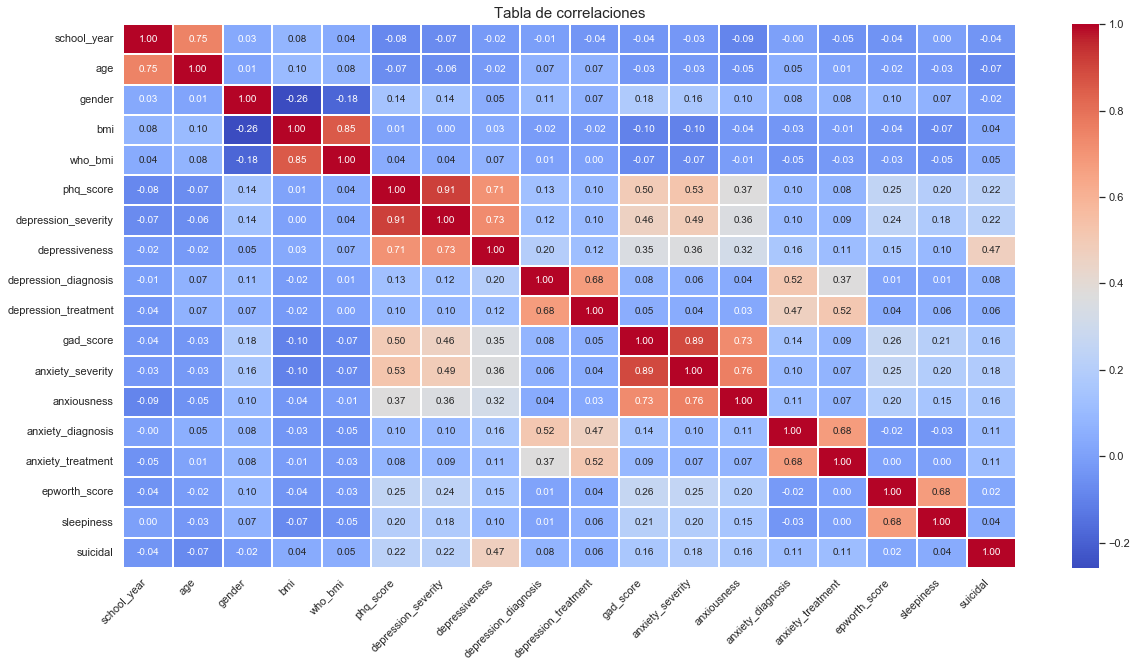

In [29]:
# Asignar un tamaño más grande a la figura para evitar superposiciones
plt.figure(figsize=(20, 10))  # Cambia el tamaño de la figura según tus necesidades

# Calcular la matriz de correlaciones (ya calculada en tu código previo)
correlation_matrix = XY_clean.corr()

# Dibujar el mapa de calor con anotaciones, usando un tamaño de fuente personalizado
sns.heatmap(
    correlation_matrix,
    annot=True,  # Muestra valores numéricos en las celdas
    cmap='coolwarm',  # Color del mapa de calor
    fmt=".2f",  # Formato para los valores numéricos
    annot_kws={"size": 10},  # Tamaño de la fuente de los números
    linewidths=1,  # Grosor de las líneas entre celdas
    linecolor='white'  # Color de las líneas entre celdas
)

# Título de la figura
plt.title("Tabla de correlaciones", fontsize=15)

plt.xticks(rotation=45, ha='right')

# Mostrar el mapa de calor
plt.savefig('./tabla_correlaciones.png')
plt.show()

## Selección de variables:

In [30]:
XY_clean.head()

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
1,1,18,0,19.84,1,8.0,1,0,0,0,5,1,0,0,0,14.0,1,0
2,1,19,0,25.10,2,8.0,1,0,0,0,6,1,0,0,0,6.0,0,0
4,1,18,0,25.62,2,6.0,1,0,0,0,14,2,1,0,0,3.0,0,0
5,1,18,0,22.13,1,3.0,0,0,0,0,2,0,0,0,0,2.0,0,0
6,1,18,0,22.41,1,6.0,1,0,0,0,4,0,0,0,0,3.0,0,0


In [31]:
# Identificar pares de variables con alta correlación
high_corr_vars = set()
threshold = 0.8  # Umbral de alta correlación

# Iterar sobre los índices y columnas de la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.columns[j]
            high_corr_vars.add((rowname, colname, correlation_matrix.iloc[i, j]))

# Convertir el set a un DataFrame para una manipulación más fácil
high_corr_df = pd.DataFrame(list(high_corr_vars), columns=['Variable 1', 'Variable 2', 'Correlation'])

In [32]:
# Solo aplicar valor absoluto a la columna de correlación
high_corr_df['Correlation'] = high_corr_df['Correlation'].abs()
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

high_corr_df

,Variable 1,Variable 2,Correlation
2,phq_score,depression_severity,0.911742
0,gad_score,anxiety_severity,0.893450
1,bmi,who_bmi,0.853540


Tras el análisis de las correlaciones y teniendo en cuenta que son variables categóricas basadas en la puntuación obtenida en otras variables, descartamos las siguientes variables:

- 'Who_bmi'.
- 'Depression_severity'.
- Anxiety_severity'.

In [33]:
# Eliminar las columnas especificadas del DataFrame
XY_clean = XY_clean.drop(['who_bmi', 'depression_severity', 'anxiety_severity'], axis=1)

In [34]:
# Guardar el DataFrame XY en un archivo CSV
XY_clean.to_csv('XY.csv', index=False)

In [36]:
XY = pd.read_csv('./XY.csv')

In [37]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_year           652 non-null    int64  
 1   age                   652 non-null    int64  
 2   gender                652 non-null    int64  
 3   bmi                   652 non-null    float64
 4   phq_score             652 non-null    float64
 5   depressiveness        652 non-null    int64  
 6   depression_diagnosis  652 non-null    int64  
 7   depression_treatment  652 non-null    int64  
 8   gad_score             652 non-null    int64  
 9   anxiousness           652 non-null    int64  
 10  anxiety_diagnosis     652 non-null    int64  
 11  anxiety_treatment     652 non-null    int64  
 12  epworth_score         652 non-null    float64
 13  sleepiness            652 non-null    int64  
 14  suicidal              652 non-null    int64  
dtypes: float64(3), int64(12

In [38]:
XY.describe()

,school_year,age,gender,bmi,phq_score,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,2.334356,20.162577,0.500000,23.212408,6.087423,0.184049,0.073620,0.062883,5.972393,0.154908,0.065951,0.065951,5.805215,0.136503,0.047546
std,1.169971,1.544410,0.500384,3.035030,3.220999,0.387822,0.261351,0.242940,3.211802,0.362095,0.248387,0.248387,3.271217,0.343586,0.212967
min,1.000000,18.000000,0.000000,14.880000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,20.960000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,2.000000,20.000000,0.500000,23.000000,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,3.000000,21.000000,1.000000,25.250000,8.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
max,4.000000,24.000000,1.000000,32.110000,14.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000
